In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data_2019 = pd.read_csv('data/GE_india_2019_results.csv',encoding= 'unicode_escape')
Data_2014 = pd.read_csv('data/GE_india_2014_results.csv',encoding= 'unicode_escape')

In [3]:
Data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state/ut        8568 non-null   object 
 1   PC              8568 non-null   object 
 2   candidate_name  8568 non-null   object 
 3   party           8568 non-null   object 
 4   evm_votes       8568 non-null   int64  
 5   postal_votes    8568 non-null   int64  
 6   migrant_votes   85 non-null     float64
 7   total_votes     8568 non-null   int64  
 8   percent_votes   8568 non-null   float64
 9   rank            8568 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 669.5+ KB


In [4]:
Data_2019.head()

,state/ut,PC,candidate_name,party,evm_votes,postal_votes,migrant_votes,total_votes,percent_votes,rank
0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,KULDEEP RAI SHARMA,Indian National Congress,95249,59,NaN,95308,45.98,1
1,Andaman & Nicobar Islands,Andaman & Nicobar Islands,VISHAL JOLLY,Bharatiya Janata Party,93772,129,NaN,93901,45.30,2
2,Andaman & Nicobar Islands,Andaman & Nicobar Islands,PARITOSH KUMAR HALDAR,Independent,5339,2,NaN,5341,2.58,3
3,Andaman & Nicobar Islands,Andaman & Nicobar Islands,SANJAY MESHACK,Aam Aadmi Party,2837,2,NaN,2839,1.37,4
4,Andaman & Nicobar Islands,Andaman & Nicobar Islands,PRAKASH MINJ,Bahujan Samaj Party,2478,8,NaN,2486,1.20,5


In [5]:
Data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state/ut        8355 non-null   object
 1   PC              8355 non-null   object
 2   candidate_name  8355 non-null   object
 3   party           8355 non-null   object
 4   evm_votes       8355 non-null   int64 
 5   postal_votes    8355 non-null   int64 
 6   total_votes     8355 non-null   int64 
 7   Rank            8355 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 522.3+ KB


In [6]:
Data_2014.head()

,state/ut,PC,candidate_name,party,evm_votes,postal_votes,total_votes,Rank
0,Andhra Pradesh,Adilabad,GODAM NAGESH,Telangana Rashtra Samithi,425762,5085,430847,1
1,Andhra Pradesh,Adilabad,NARESH,Indian National Congress,257994,1563,259557,2
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,Telugu Desam,182879,1319,184198,3
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,Bahujan Samaj Party,94363,57,94420,4
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,Independent,41028,4,41032,5


In [7]:
#columns in 2019 not in 2014

set(Data_2014.columns) - set(Data_2019.columns)

{'Rank'}

In [8]:
#columns in 2014 not in 2019

set(Data_2019.columns) - set(Data_2014.columns)

{'migrant_votes', 'percent_votes', 'rank'}

In [9]:
Data_2014.rename(columns = {'Rank':'rank'},inplace = True)

In [10]:
Data_2019 = Data_2019[Data_2014.columns]

In [11]:
str_col = ['state/ut', 'PC', 'candidate_name', 'party']

for i in str_col:
    Data_2014[i] = Data_2014[i].str.strip().str.upper()
    Data_2019[i] = Data_2019[i].str.strip().str.upper()

In [12]:
Data_2014['year'] =2014
Data_2019['year'] =2019

election_data = pd.concat([Data_2014,Data_2019],ignore_index = True)
election_data.head()

,state/ut,PC,candidate_name,party,evm_votes,postal_votes,total_votes,rank,year
0,ANDHRA PRADESH,ADILABAD,GODAM NAGESH,TELANGANA RASHTRA SAMITHI,425762,5085,430847,1,2014
1,ANDHRA PRADESH,ADILABAD,NARESH,INDIAN NATIONAL CONGRESS,257994,1563,259557,2,2014
2,ANDHRA PRADESH,ADILABAD,RAMESH RATHOD,TELUGU DESAM,182879,1319,184198,3,2014
3,ANDHRA PRADESH,ADILABAD,RATHOD SADASHIV,BAHUJAN SAMAJ PARTY,94363,57,94420,4,2014
4,ANDHRA PRADESH,ADILABAD,NETHAWATH RAMDAS,INDEPENDENT,41028,4,41032,5,2014


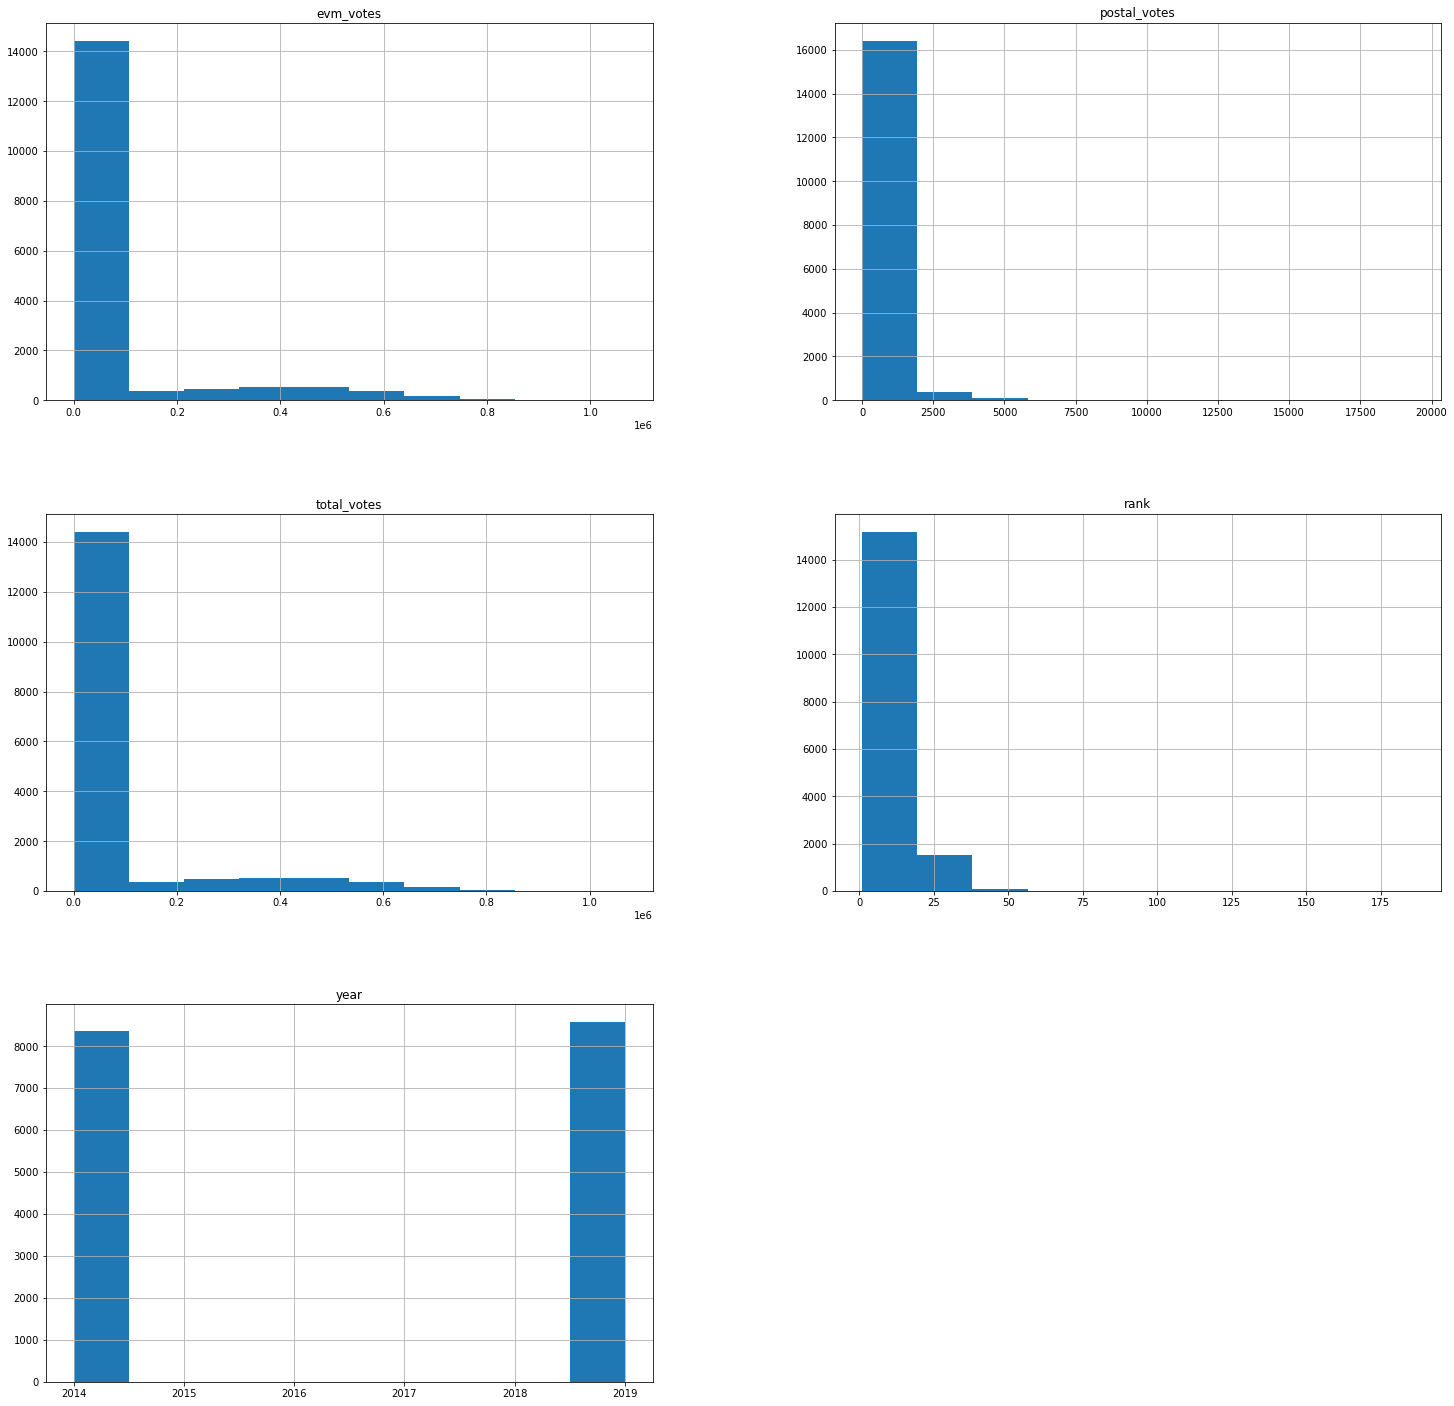

In [13]:
election_data.hist(figsize = [25,25])
plt.show()

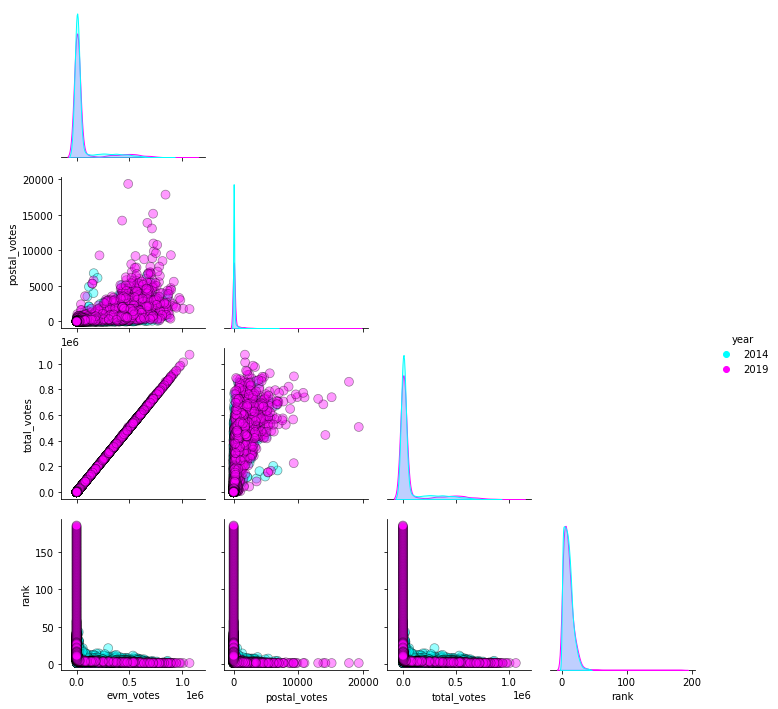

In [14]:
g = sns.pairplot(election_data
                 ,hue = 'year'
                 ,corner=True
                 ,plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'}
                 ,palette = 'cool')

### Was there any increase in number of constituency in any state?

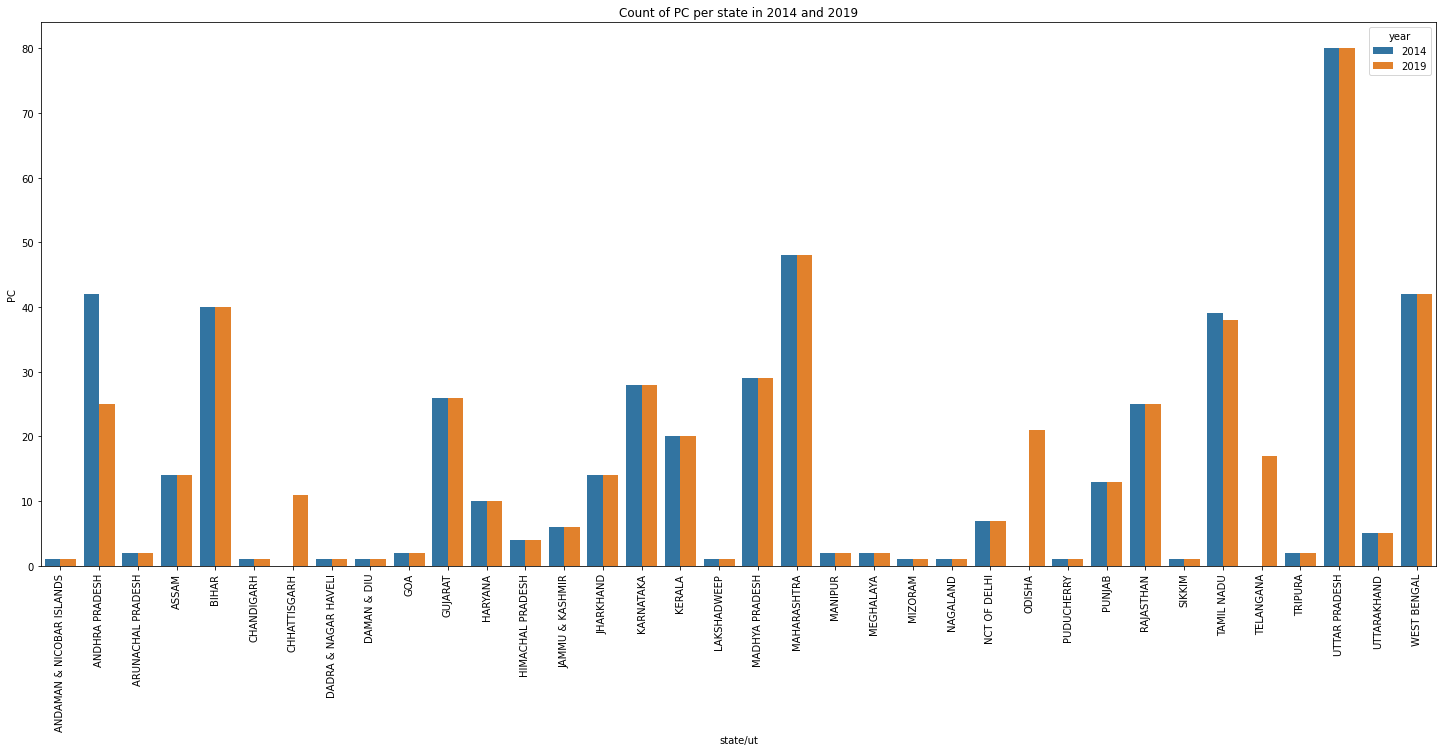

In [15]:
tst_df = election_data[['state/ut','PC','year']].drop_duplicates().groupby(['state/ut','year']).count().reset_index()
plt.figure(figsize = [25,10])
plt.title('Count of PC per state in 2014 and 2019')
ax = sns.barplot(x='state/ut', y='PC', hue = 'year', data=tst_df)
plt.xticks(rotation = 90)
plt.show()

Number of constituency, has not changed, but Andhra Pradesh it has reduced, this could be because of formation of Telangana State. Apart from that there was no change in number or constituency.

### Percent increase of voters wrt last term.

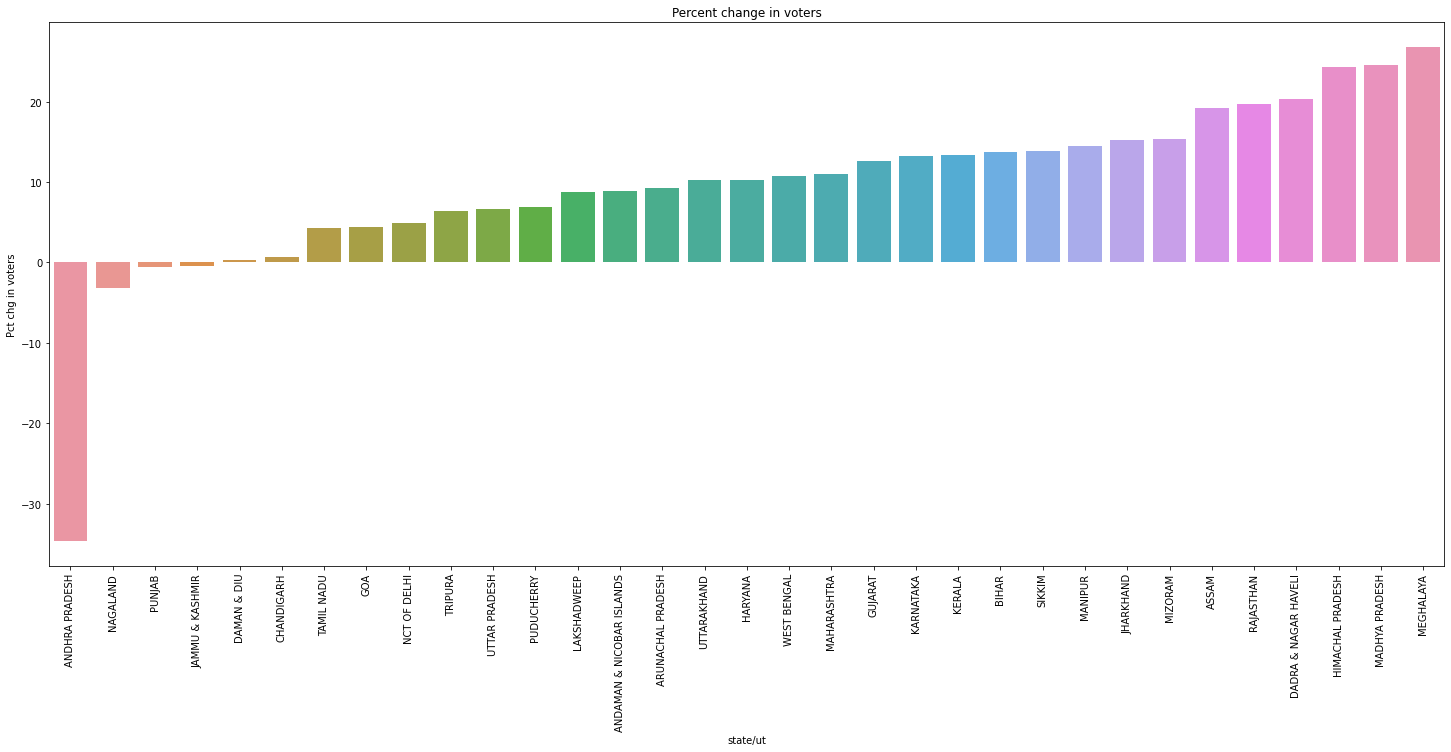

In [16]:
df = election_data.pivot_table(index='state/ut',columns=['year'],values = 'total_votes', aggfunc = 'sum').dropna().reset_index()
df.columns = ['state/ut','2014','2019']
df['Pct chg in voters'] = (df['2019']-df['2014'])/df['2014']*100
df.sort_values(by = ['Pct chg in voters'],inplace = True)

plt.figure(figsize = [25,10])
plt.title('Percent change in voters')
ax = sns.barplot(x='state/ut', y='Pct chg in voters', data=df)
plt.xticks(rotation = 90)
plt.show()

AP has reduced number of voters, because of new state formation.

Meghalay has highest increase in voter turn over. Similarly in North Eastern states in Mizoram and Assam.

### Voters share per State

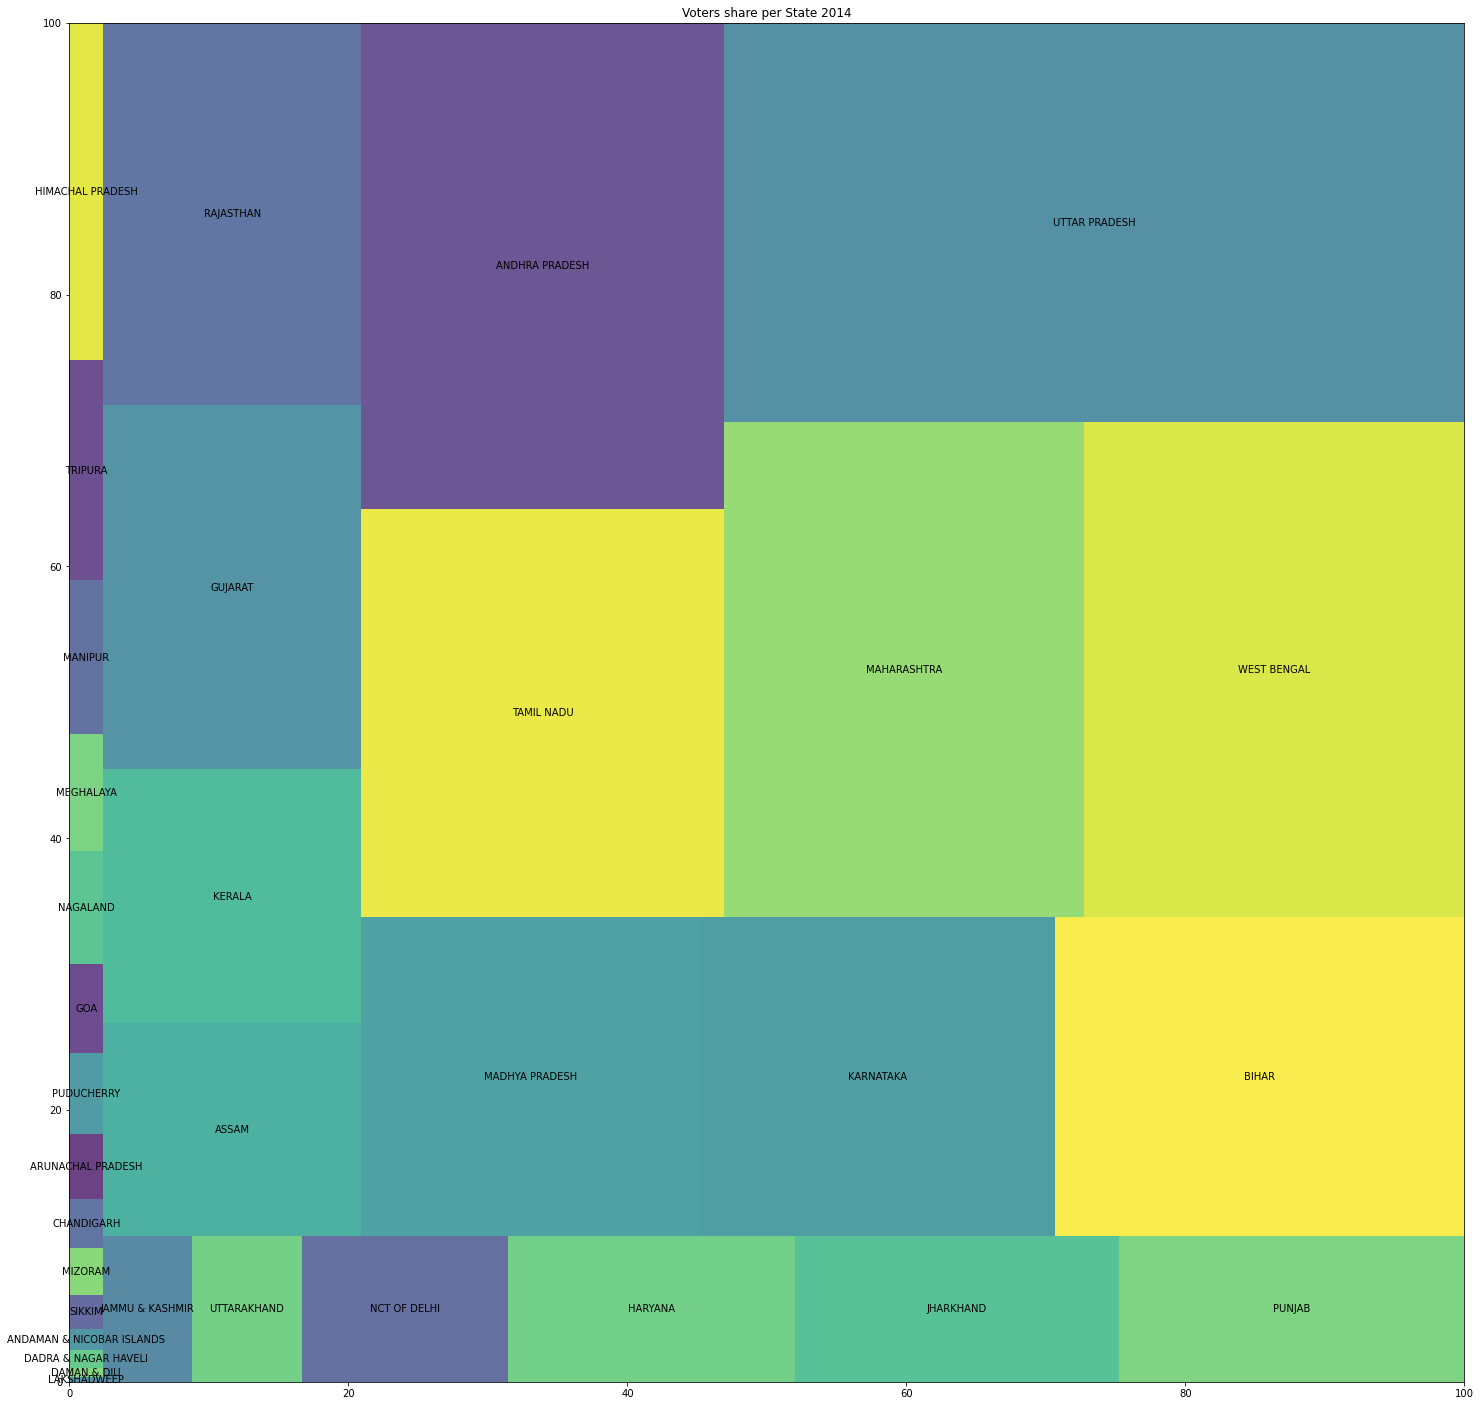

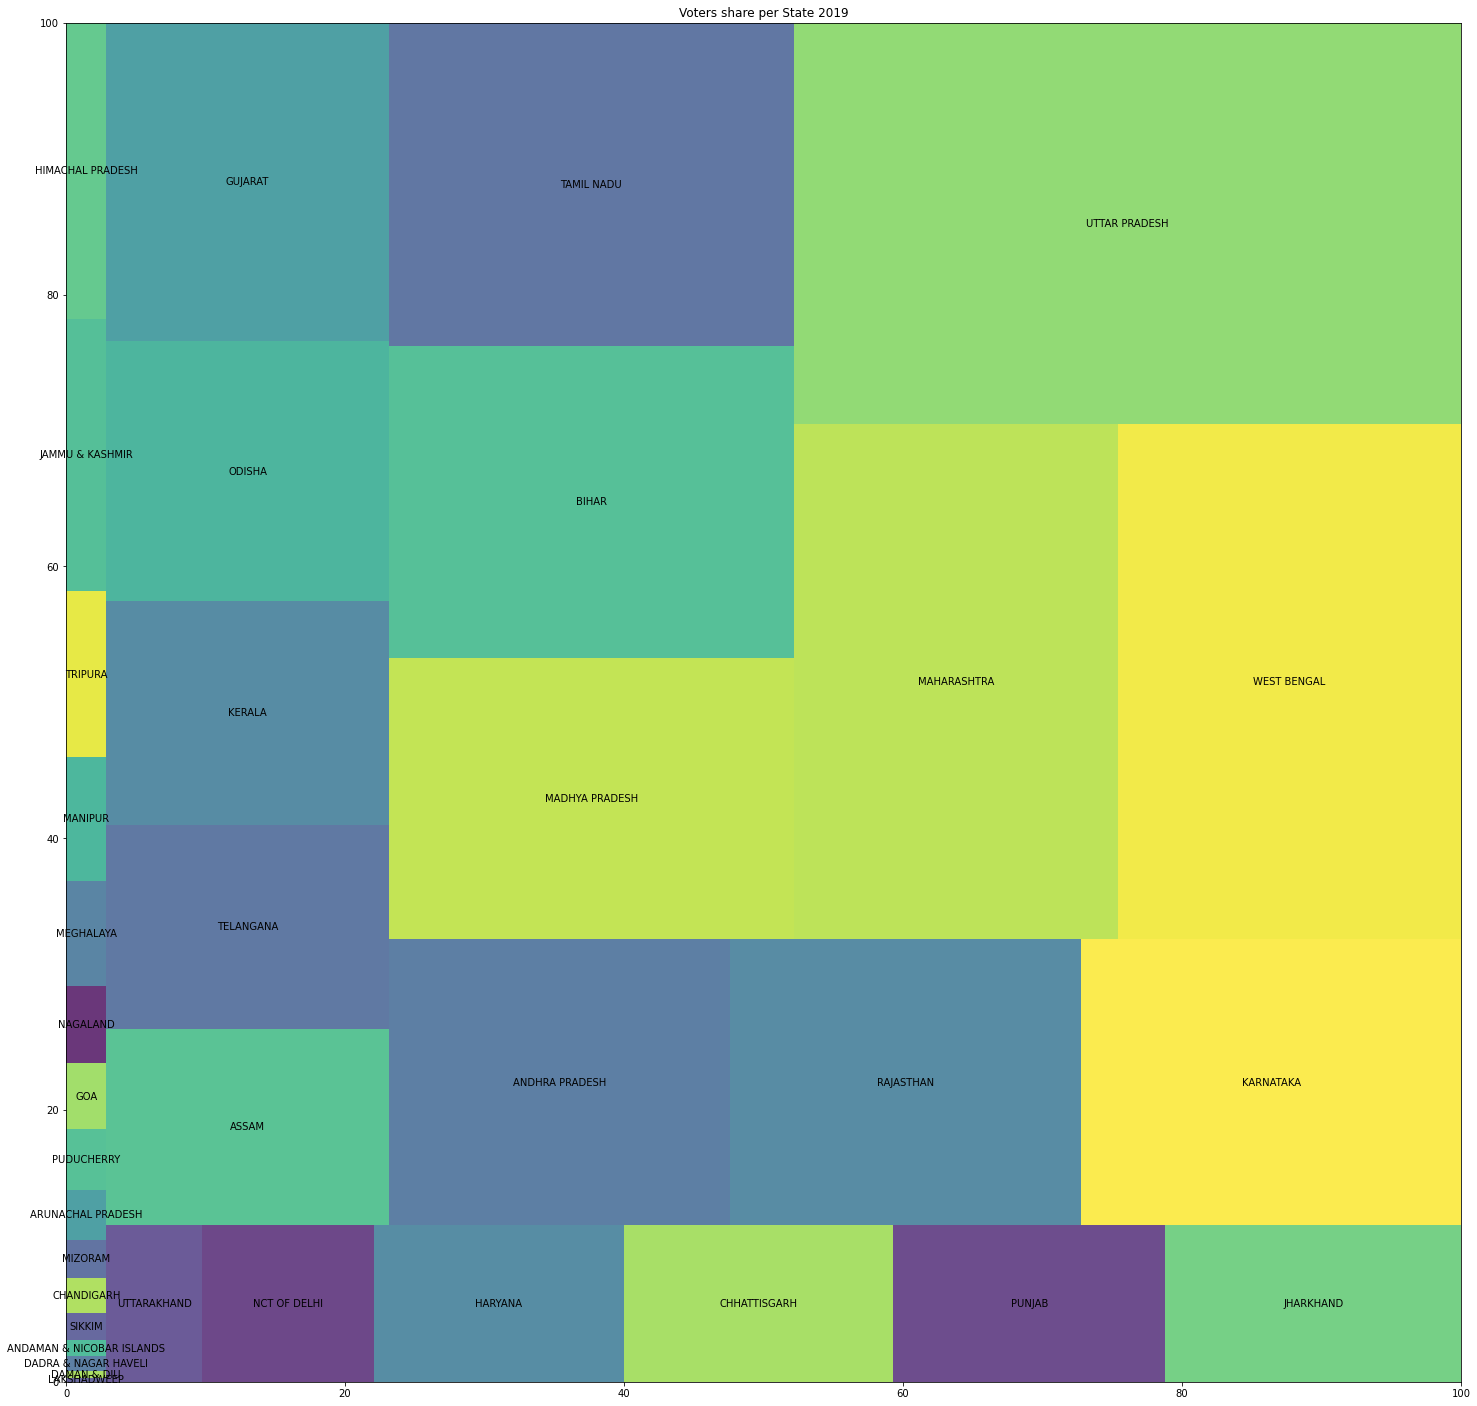

In [17]:
import squarify

df = election_data.groupby(['year','state/ut'])['total_votes'].sum().reset_index()
for i in [2014,2019]:
    x = sum(df[df['year'] == i]['total_votes'])
    df.loc[df['year'] == i,'Pct Voters'] = (df[df['year'] == i]['total_votes']/x)*100
    plt.figure(figsize = [25,25])
    plt.title(str('Voters share per State '+str(i)))
    df.sort_values(by = ['year','Pct Voters'],inplace = True)
    squarify.plot(sizes=df[df['year'] == i]['total_votes'],label=df[df['year'] == i]['state/ut'], alpha=.8 )
    plt.show()

UP has the highest voters. 

Maharshtra and WB have similar number of voters.

### Comparision of candidates per year.

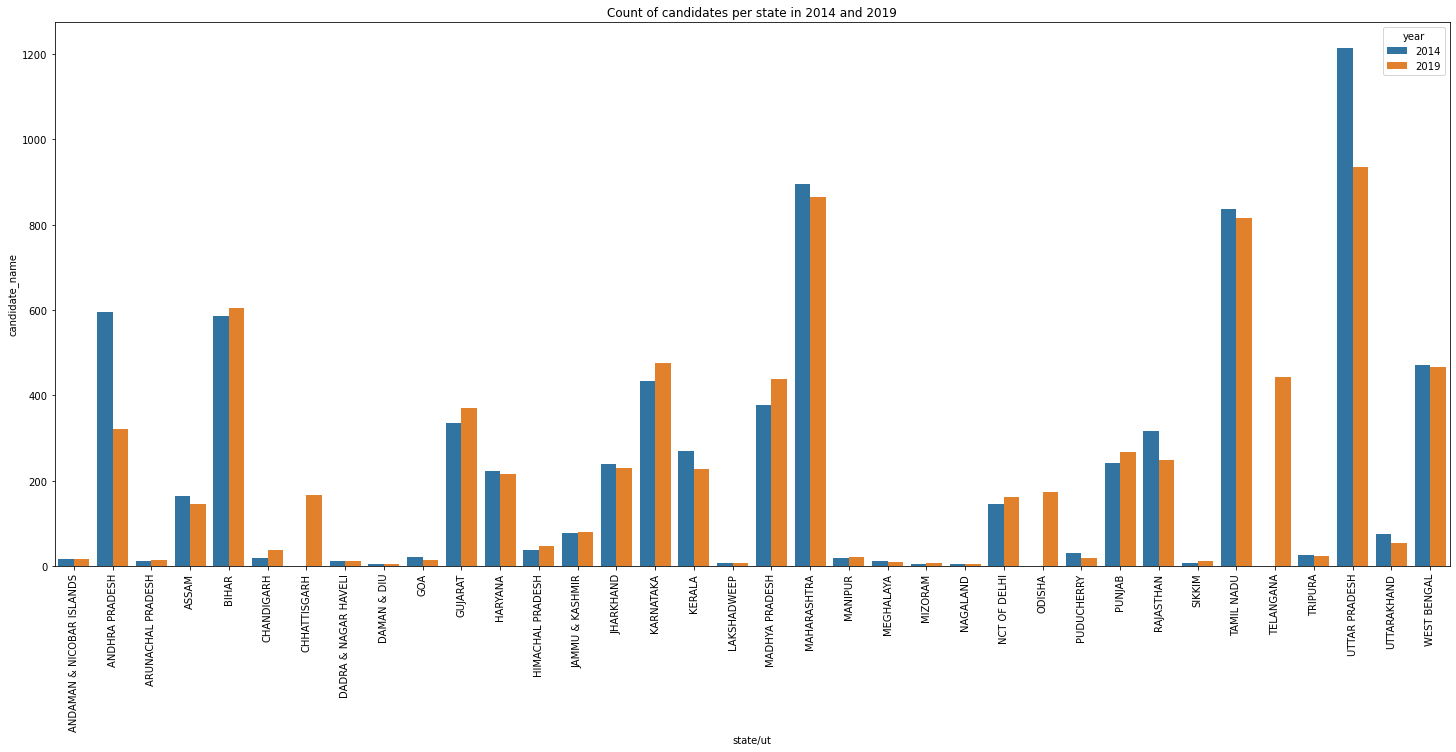

In [18]:
tst_df = election_data[['state/ut','candidate_name','year']].drop_duplicates().groupby(['state/ut','year']).count().reset_index()
plt.figure(figsize = [25,10])
plt.title('Count of candidates per state in 2014 and 2019')
ax = sns.barplot(x='state/ut', y='candidate_name', hue = 'year', data=tst_df)
plt.xticks(rotation = 90)
plt.show()

Typically number of candidates should stay same or increase. But that doesn't seem to be case is UP, weirdly number of candidates have decreased.

### Dominant Parties in each state

In [19]:
df = election_data[election_data['rank']==1].groupby(['state/ut','party','year'])['PC'].count().reset_index()
df

,state/ut,party,year,PC
0,ANDAMAN & NICOBAR ISLANDS,INDIAN NATIONAL CONGRESS,2019,1
1,ANDAMAN & NICOBAR ISLANDS,NATIONALIST CONGRESS PARTY,2014,1
2,ANDHRA PRADESH,BAHUJAN SAMAJ PARTY,2014,11
3,ANDHRA PRADESH,BHARATIYA JANATA PARTY,2014,3
4,ANDHRA PRADESH,COMMUNIST PARTY OF INDIA,2014,1
...,...,...,...,...
202,WEST BENGAL,BHARATIYA JANATA PARTY,2014,4
203,WEST BENGAL,BHARATIYA JANATA PARTY,2019,18
204,WEST BENGAL,COMMUNIST PARTY OF INDIA (MARXIST),2014,7
205,WEST BENGAL,INDIAN NATIONAL CONGRESS,2014,16


In [20]:
df = df.groupby(['state/ut', 'year']).agg({'PC':'max','party':'max'}).reset_index()
df

,state/ut,year,PC,party
0,ANDAMAN & NICOBAR ISLANDS,2014,1,NATIONALIST CONGRESS PARTY
1,ANDAMAN & NICOBAR ISLANDS,2019,1,INDIAN NATIONAL CONGRESS
2,ANDHRA PRADESH,2014,15,TELUGU DESAM
3,ANDHRA PRADESH,2019,22,YUVAJANA SRAMIKA RYTHU CONGRESS PARTY
4,ARUNACHAL PRADESH,2014,1,NATIONALIST CONGRESS PARTY
...,...,...,...,...
64,UTTAR PRADESH,2019,62,SAMAJWADI PARTY
65,UTTARAKHAND,2014,3,BHARATIYA JANATA PARTY
66,UTTARAKHAND,2019,5,BHARATIYA JANATA PARTY
67,WEST BENGAL,2014,16,INDIAN NATIONAL CONGRESS


### Parties whose dominance prevailes

In [21]:
df = df.pivot(index='state/ut',columns=['year'],values = 'party').dropna().reset_index()
df

year,state/ut,2014,2019
0,ANDAMAN & NICOBAR ISLANDS,NATIONALIST CONGRESS PARTY,INDIAN NATIONAL CONGRESS
1,ANDHRA PRADESH,TELUGU DESAM,YUVAJANA SRAMIKA RYTHU CONGRESS PARTY
2,ARUNACHAL PRADESH,NATIONALIST CONGRESS PARTY,BHARATIYA JANATA PARTY
3,ASSAM,INDIAN NATIONAL CONGRESS,INDIAN NATIONAL CONGRESS
4,BIHAR,RASHTRIYA JANATA DAL,LOK JAN SHAKTI PARTY
5,CHANDIGARH,BHARATIYA JANATA PARTY,BHARATIYA JANATA PARTY
6,DADRA & NAGAR HAVELI,NATIONALIST CONGRESS PARTY,INDEPENDENT
7,DAMAN & DIU,INDIAN NATIONAL CONGRESS,BHARATIYA JANATA PARTY
8,GOA,INDIAN NATIONAL CONGRESS,INDIAN NATIONAL CONGRESS
9,GUJARAT,NATIONALIST CONGRESS PARTY,BHARATIYA JANATA PARTY


In [22]:
df.columns

Index(['state/ut', 2014, 2019], dtype='object', name='year')

In [23]:
df['Match'] = df[2014] == df[2019]
df[df['Match']]

year,state/ut,2014,2019,Match
3,ASSAM,INDIAN NATIONAL CONGRESS,INDIAN NATIONAL CONGRESS,True
5,CHANDIGARH,BHARATIYA JANATA PARTY,BHARATIYA JANATA PARTY,True
8,GOA,INDIAN NATIONAL CONGRESS,INDIAN NATIONAL CONGRESS,True
17,MADHYA PRADESH,INDIAN NATIONAL CONGRESS,INDIAN NATIONAL CONGRESS,True
18,MAHARASHTRA,SHIVSENA,SHIVSENA,True
25,PUNJAB,SHIROMANI AKALI DAL,SHIROMANI AKALI DAL,True
30,UTTAR PRADESH,SAMAJWADI PARTY,SAMAJWADI PARTY,True
31,UTTARAKHAND,BHARATIYA JANATA PARTY,BHARATIYA JANATA PARTY,True
32,WEST BENGAL,INDIAN NATIONAL CONGRESS,INDIAN NATIONAL CONGRESS,True


### Candidates that repeated in states and district

In [24]:
df = election_data[election_data['rank']==1][['state/ut','PC','candidate_name','year']].pivot(index = ['state/ut','PC']
                                                                              ,columns = 'year'
                                                                              ,values = 'candidate_name').fillna('NOT AVAILABLE').reset_index()
df.columns = ['state/ut','PC','2014','2019']
df.head()

df['Match'] = df['2014'] == df['2019']
df[df['Match']].groupby(['state/ut'])['Match'].count()

state/ut
ANDHRA PRADESH      1
BIHAR               1
CHANDIGARH          1
GUJARAT             2
HIMACHAL PRADESH    1
JHARKHAND           1
KARNATAKA           3
KERALA              1
MADHYA PRADESH      2
MAHARASHTRA         2
PUNJAB              2
RAJASTHAN           1
TAMIL NADU          3
UTTAR PRADESH       6
UTTARAKHAND         2
WEST BENGAL         7
Name: Match, dtype: int64

In [25]:
df[df['Match']]

,state/ut,PC,2014,2019,Match
29,ANDHRA PRADESH,NELLORE,ADALA PRABHAKARA REDDY,ADALA PRABHAKARA REDDY,True
65,BIHAR,BUXAR,ASHWINI KUMAR CHOUBEY,ASHWINI KUMAR CHOUBEY,True
99,CHANDIGARH,CHANDIGARH,KIRRON KHER,KIRRON KHER,True
118,GUJARAT,AMRELI,KACHHADIYA NARANBHAI BHIKHABHAI,KACHHADIYA NARANBHAI BHIKHABHAI,True
128,GUJARAT,JUNAGADH,CHUDASAMA RAJESHBHAI NARANBHAI,CHUDASAMA RAJESHBHAI NARANBHAI,True
152,HIMACHAL PRADESH,HAMIRPUR,ANURAG SINGH THAKUR,ANURAG SINGH THAKUR,True
166,JHARKHAND,GODDA,NISHIKANT DUBEY,NISHIKANT DUBEY,True
181,KARNATAKA,BELGAUM,ANGADI SURESH CHANNABASAPPA,ANGADI SURESH CHANNABASAPPA,True
196,KARNATAKA,KOPPAL,KARADI SANGANNA AMARAPPA,KARADI SANGANNA AMARAPPA,True
203,KARNATAKA,UTTARA KANNADA,ANANTKUMAR HEGDE,ANANTKUMAR HEGDE,True


### Voters per constituency for each State

In [26]:
df = (election_data.groupby(by = ['state/ut','year'])['total_votes'].sum() / election_data.groupby(by = ['state/ut','year'])['PC'].count()).reset_index()

In [27]:
df.rename(columns = {0:'Voters Density'},inplace = True)

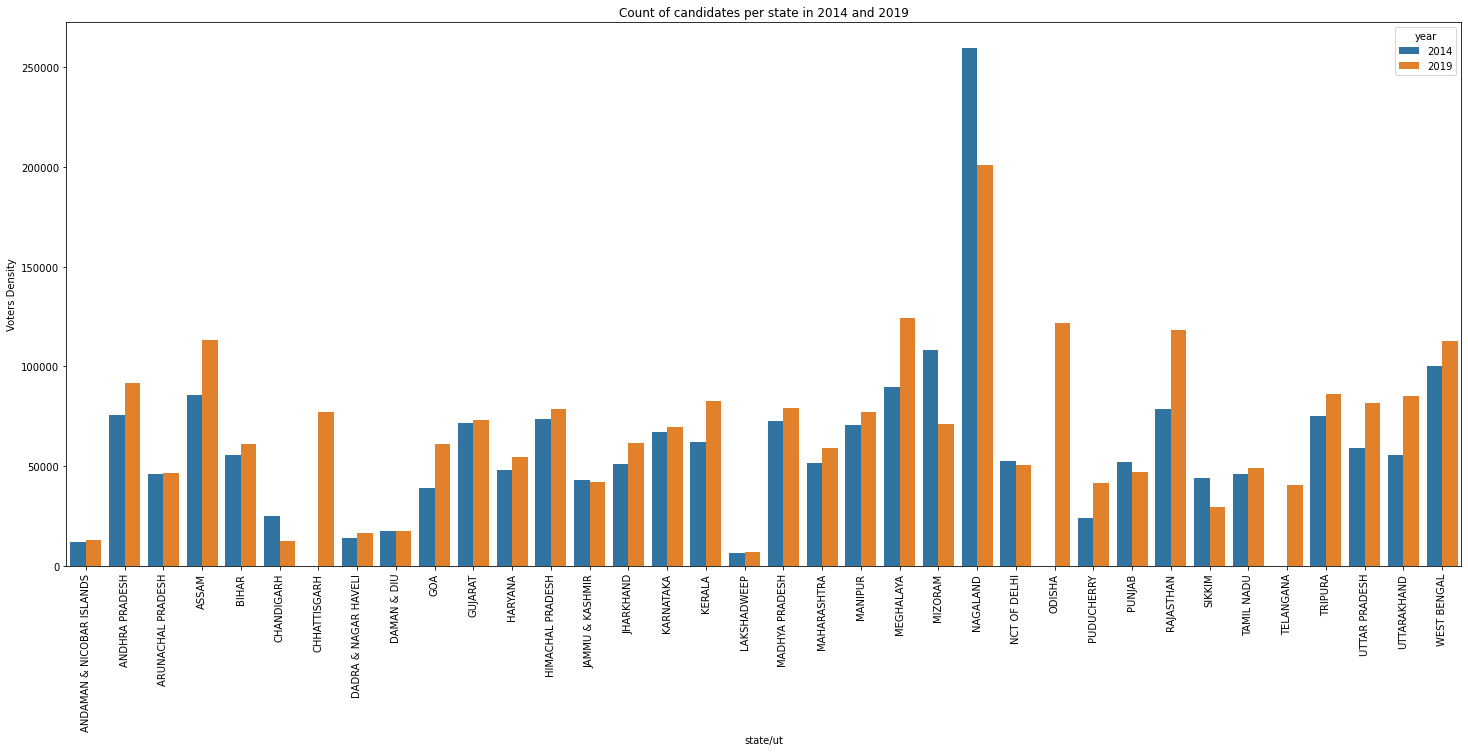

In [28]:
plt.figure(figsize = [25,10])
plt.title('Count of candidates per state in 2014 and 2019')
ax = sns.barplot(x='state/ut', y='Voters Density', hue = 'year', data=df)
plt.xticks(rotation = 90)
plt.show()

Total_votes cann't be a great indicator to understand voters turnout. Voters density will explain the averge vote per constituency. This will explain on an average no. of votes per constituency.
A lower density might be a red flag. A higher density could mean a place for creating new constituency.

In [29]:
df = df.pivot(index='state/ut',columns=['year'],values = 'Voters Density').dropna().reset_index()

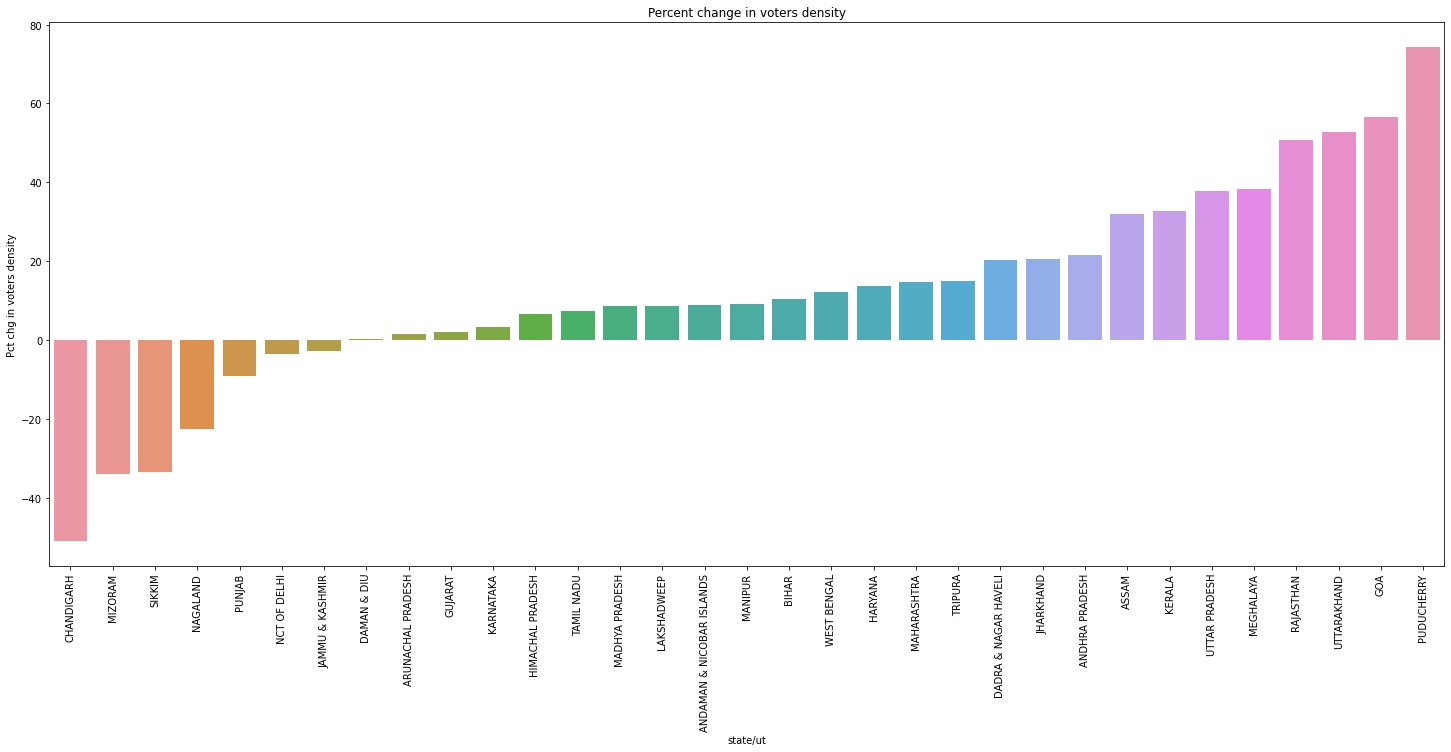

In [30]:
df['Pct chg in voters density'] = (df[2019]-df[2014])/df[2014]*100
df.sort_values(by = ['Pct chg in voters density'],inplace = True)

plt.figure(figsize = [25,10])
plt.title('Percent change in voters density')
ax = sns.barplot(x='state/ut', y='Pct chg in voters density', data=df)
plt.xticks(rotation = 90)
plt.show()

An higher number should be a positive indicator, that voter turnout has improved. Eg.'Puducherry' and 'Goa' seems to have higher voter turnout.